In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tkinter as tk
import matplotlib.pyplot as plt
import seaborn as sns


def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]

def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]
print("All necessary libraries are imported")

All necessary libraries are imported


In [3]:
df = pd.read_csv("C:\\Users\\PC\\Downloads\\movie1.csv",encoding='unicode_escape')
print("Data is loaded successfully")
df.head()

Data is loaded successfully


,index,title,director,cast,genres,Release Month,Release Date,Highest Grosser By Year(in crores)
0,0,Balika Badhu aka. Baby Bride,P. T. Shaida (Tulsidutt Shaida),"shaida,pandit,ali,miss,tarak,bagcha,tulsidutt",social,NaN,NaN,NaN
1,1,Daksha Yagna aka. Sati Parvati,Vishnupant Divekar,"prabha,khalil,vaidya",mythology,NaN,NaN,NaN
2,2,Jalandhar Vrinda aka. Sati Tulsi Vrinda,G. V. Sane,unknown,mythology,NaN,NaN,NaN
3,3,Kansa Vadha aka. End Of The Tyrant King,G. V. Sane,unknown,mythology,NaN,NaN,NaN
4,4,Katorabhar Khoon aka.The Stinger Stung aka. Za...,S. N. Patankar,"koregaonkar,gokhale,vyas,trymbakrao,pradhan,ta...",social,NaN,NaN,NaN


In [4]:
features = ['cast','genres','director']

for feature in features:df[feature] = df[feature].fillna('')

def combine_features(row):
    try:
        return row['cast']+" "+row["genres"]+" "+row["director"]
    except:
        print ("Error:", row )

df["combined_features"] = df.apply(combine_features,axis=1)

In [5]:
cv = CountVectorizer()

count_matrix = cv.fit_transform(df["combined_features"])

cosine_sim = cosine_similarity(count_matrix)

In [6]:
def wd():
    x1 = entry1.get()
    movie_user_likes = entry1.get()
    movie_index = get_index_from_title(movie_user_likes)
    similar_movies =  list(enumerate(cosine_sim[movie_index]))
    sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)

    label3 = tk.Label(root, text= 'We recommend to you the below movies:',font=('times', 20 , 'bold'))
    canvas1.create_window(750, 210, window=label3)
    i=0
    j=260
    for element in sorted_similar_movies:
        label4 = tk.Label(root, text=get_title_from_index(element[0]),font=('times', 20))
        canvas1.create_window(750, j, window=label4)
        j=j+50
        i=i+1
        if i>=6:
            break

root= tk.Tk()
root.title("Movie Recommendation System")
canvas1 = tk.Canvas(root, width = 1920, height = 1080,  relief = 'raised')
canvas1.pack()

label2 = tk.Label(root, text="Enter any Bollywood movie")
label2.config(font=('times', 25 , 'bold'))
canvas1.create_window(750, 60, window=label2)
name=tk.StringVar()

entry1 = tk.Entry (root,textvariable=name)
canvas1.create_window(750, 100,height=30,width=200,window=entry1)


button1 = tk.Button(root,text='Get the Recommended Movies', command=wd, bg='dark grey', fg='white', font=('times', 20, 'bold'))
button1.pack()
canvas1.create_window(750, 150, window=button1)

root.mainloop()

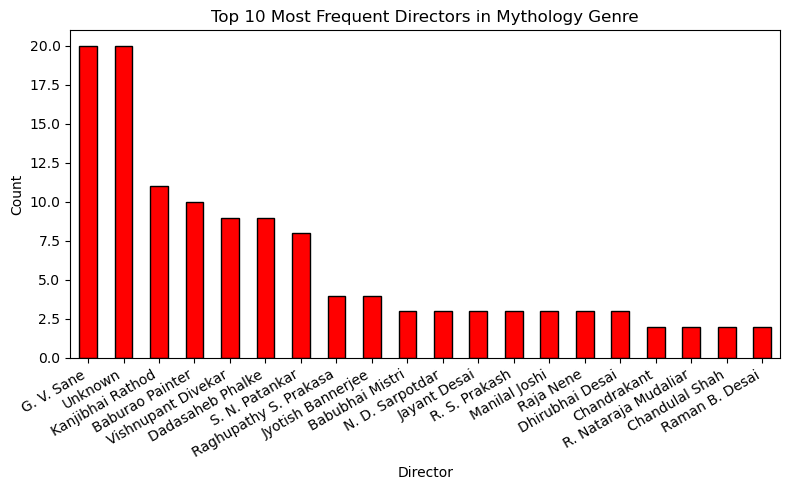

In [16]:
mythology_movies = df[df['genres'] == 'mythology']

# Plot a bar chart for the distribution of directors in the "Mythology" genre
plt.figure(figsize=(8, 5))
mythology_movies['director'].value_counts().head(20).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Most Frequent Directors in Mythology Genre')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right') 
plt.tight_layout()
plt.show()

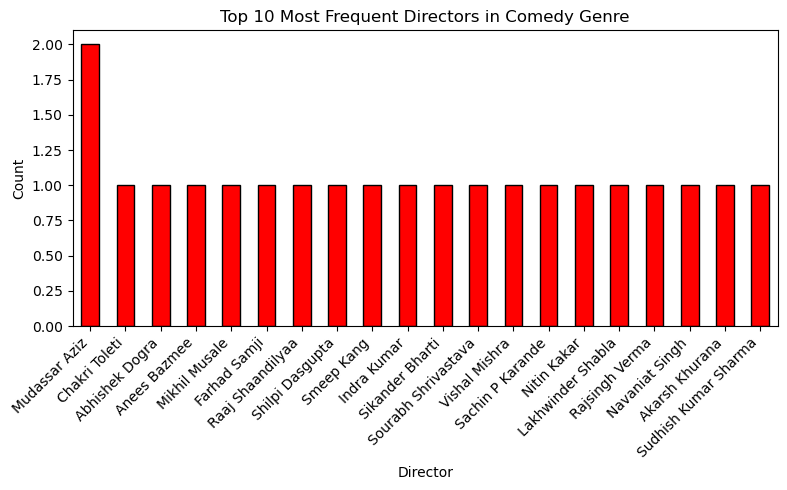

In [25]:
comedy_movies = df[df['genres'] == 'Comedy']

# Plot a bar chart for the distribution of directors in the "Comedy" genre
plt.figure(figsize=(8, 5))
comedy_movies['director'].value_counts().head(20).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Most Frequent Directors in Comedy Genre')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

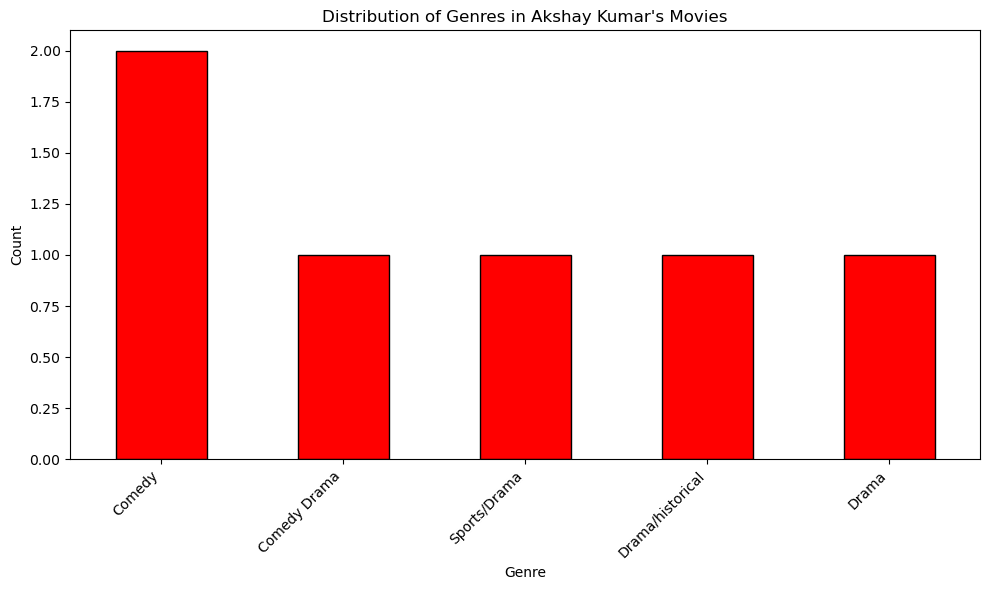

In [24]:
akshay_kumar_movies = df[df['cast'].str.contains('Akshay Kumar', na=False)]

# Plot a bar chart for the distribution of genres in Akshay Kumar's movies
plt.figure(figsize=(10, 6))
akshay_kumar_movies['genres'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Genres in Akshay Kumar\'s Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

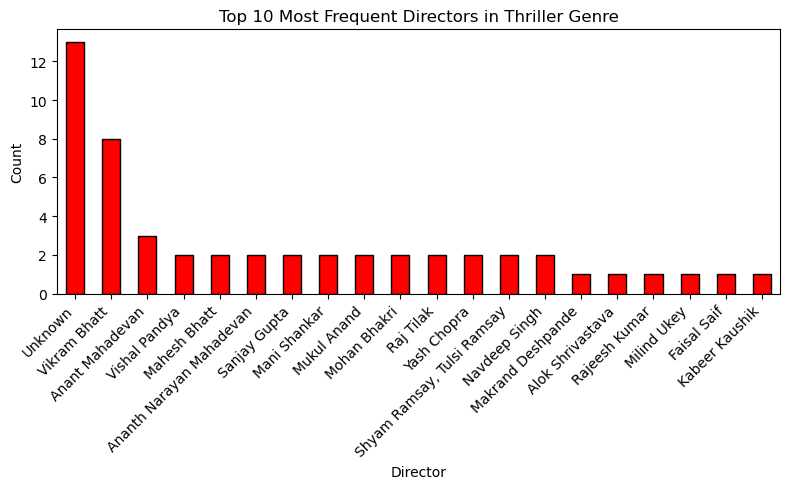

In [27]:
thriller_movies = df[df['genres'] == 'thriller']

# Plot a bar chart for the distribution of directors in the "thriller" genre
plt.figure(figsize=(8, 5))
thriller_movies['director'].value_counts().head(20).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Most Frequent Directors in Thriller Genre')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_13468\2693343282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['title'])


ValueError: could not convert string to float: 'Balika Badhu aka. Baby Bride'

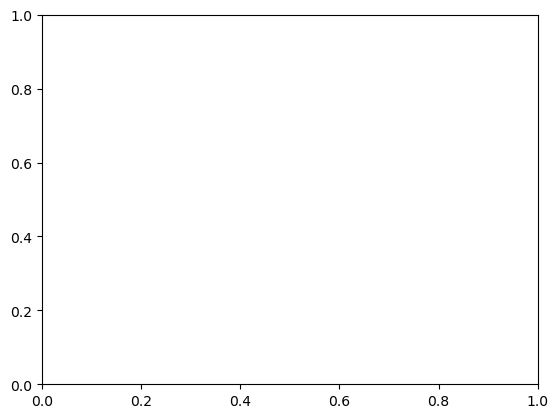

In [30]:
sns.barplot([df['actor']=='',df['title'])